# Logistic Regression Project

Goal: Create a classification model that can predict whether or not a person has presence of heart disease based on physical features of that person

## Data

This database contains 14 physical attributes based on physical testing of a patient. The goal field refers to the presence of heart disease in the patient (0 for no presence & 1 for presence).

### Attibute Information:


1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   -- Value 1: typical angina
   -- Value 2: atypical angina
   -- Value 3: non-anginal pain
   -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest peak 
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

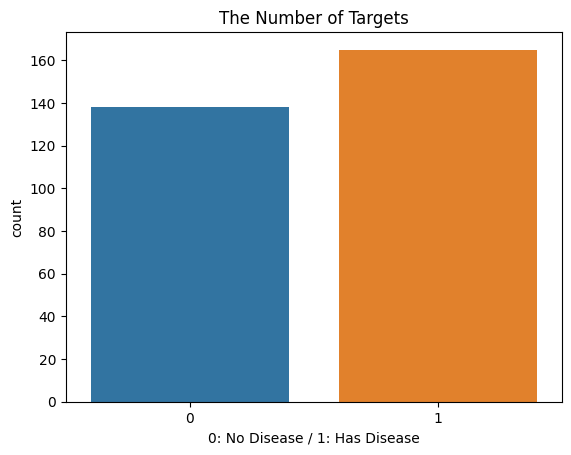

In [4]:
sns.countplot(data = df, x = 'target')
plt.title('The Number of Targets')
plt.xlabel('0: No Disease / 1: Has Disease');

In [5]:
1 - len(df[df.target == 0]) / len(df[df.target == 1])

0.1636363636363637

***Approximately Balanced***

--------------
## EDA

In [6]:
# Check Missing Data
df[df.isna().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


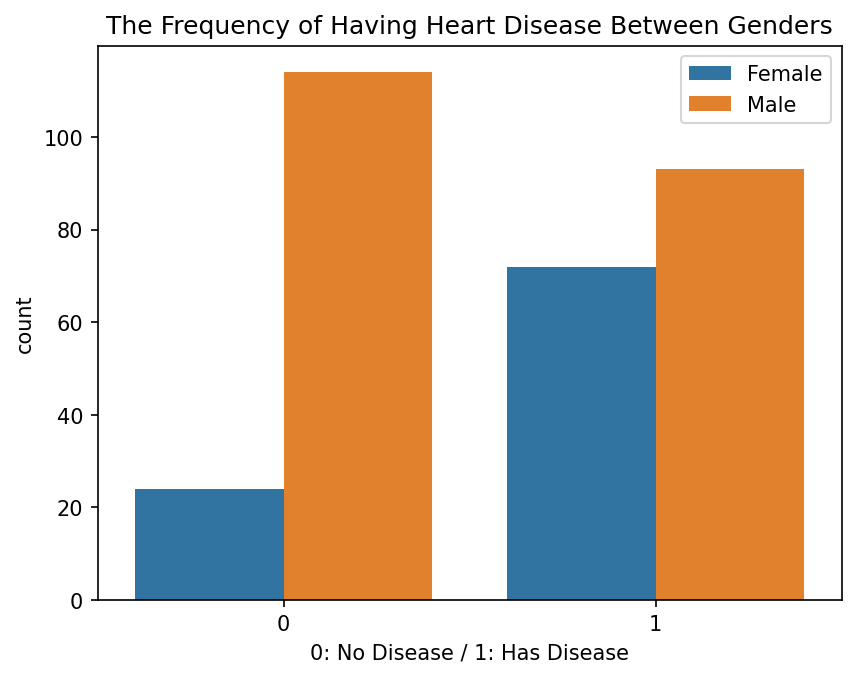

In [11]:
plt.figure(dpi = 150)
sns.countplot(data = df, x = 'target', hue = 'sex')
plt.legend(['Female', 'Male'])
plt.title('The Frequency of Having Heart Disease Between Genders')
plt.xlabel('0: No Disease / 1: Has Disease');

In [12]:
n_female = len(df[df.sex == 0])
n_female_disea = len(df[(df.sex == 0) & (df.target == 1)])

n_male = len(df[df.sex == 1])
n_male_disea = len(df[(df.sex == 1) & (df.target == 1)])

print(f'Rate for female has disease: {round(n_female_disea / n_female * 100, 1)}%')
print(f'Rate for male has disease: {round(n_male_disea / n_male * 100, 1)}%')
print(f'Proportion of both (female / male): {round(100 * (n_female_disea / n_female) / (n_male_disea / n_male), 1)}%')

Rate for female has disease: 75.0%
Rate for male has disease: 44.9%
Proportion of both (female / male): 166.9%


***Female has a higher proportion of having heart disease with 1.67 times***

C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x600 with 0 Axes>

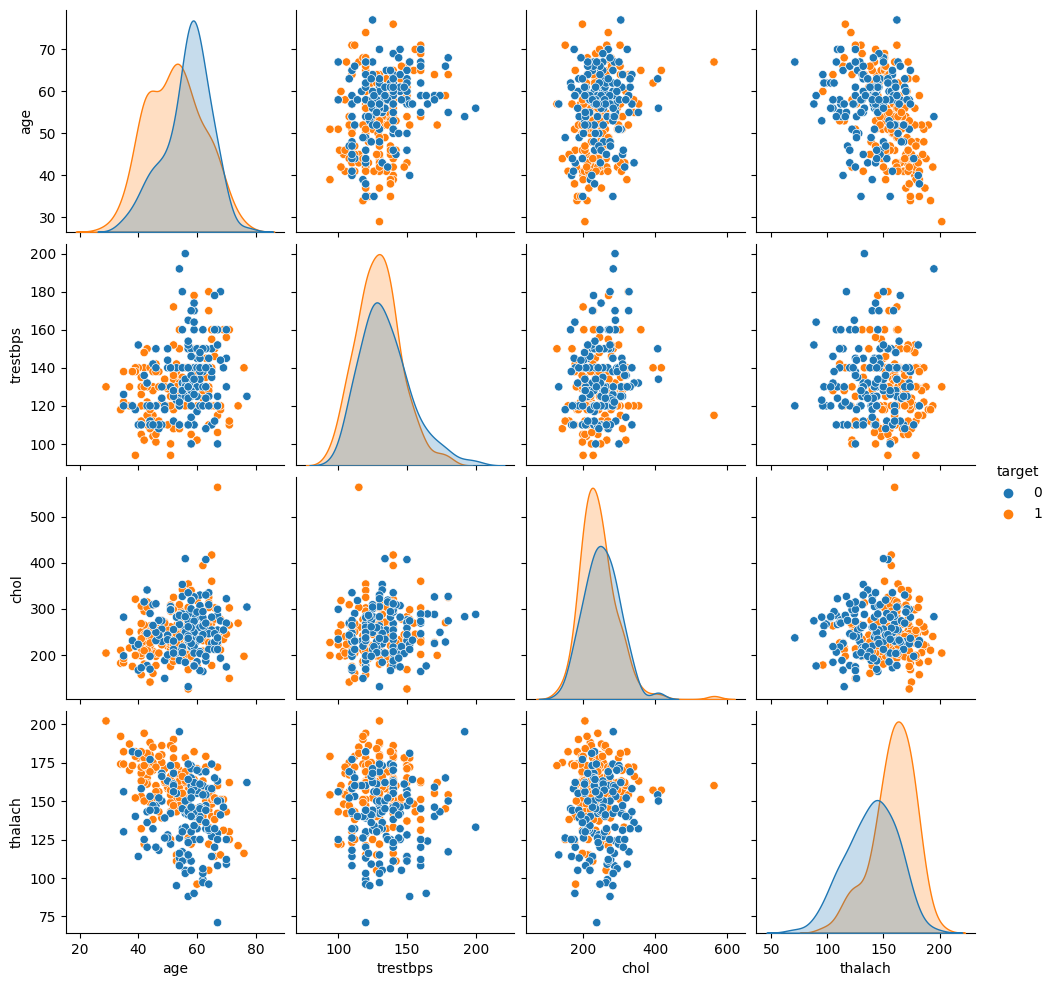

In [13]:
# Display relationships between ['age','trestbps', 'chol','thalach','target']
plt.figure(figsize = (6, 4), dpi = 150)
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue = 'target');

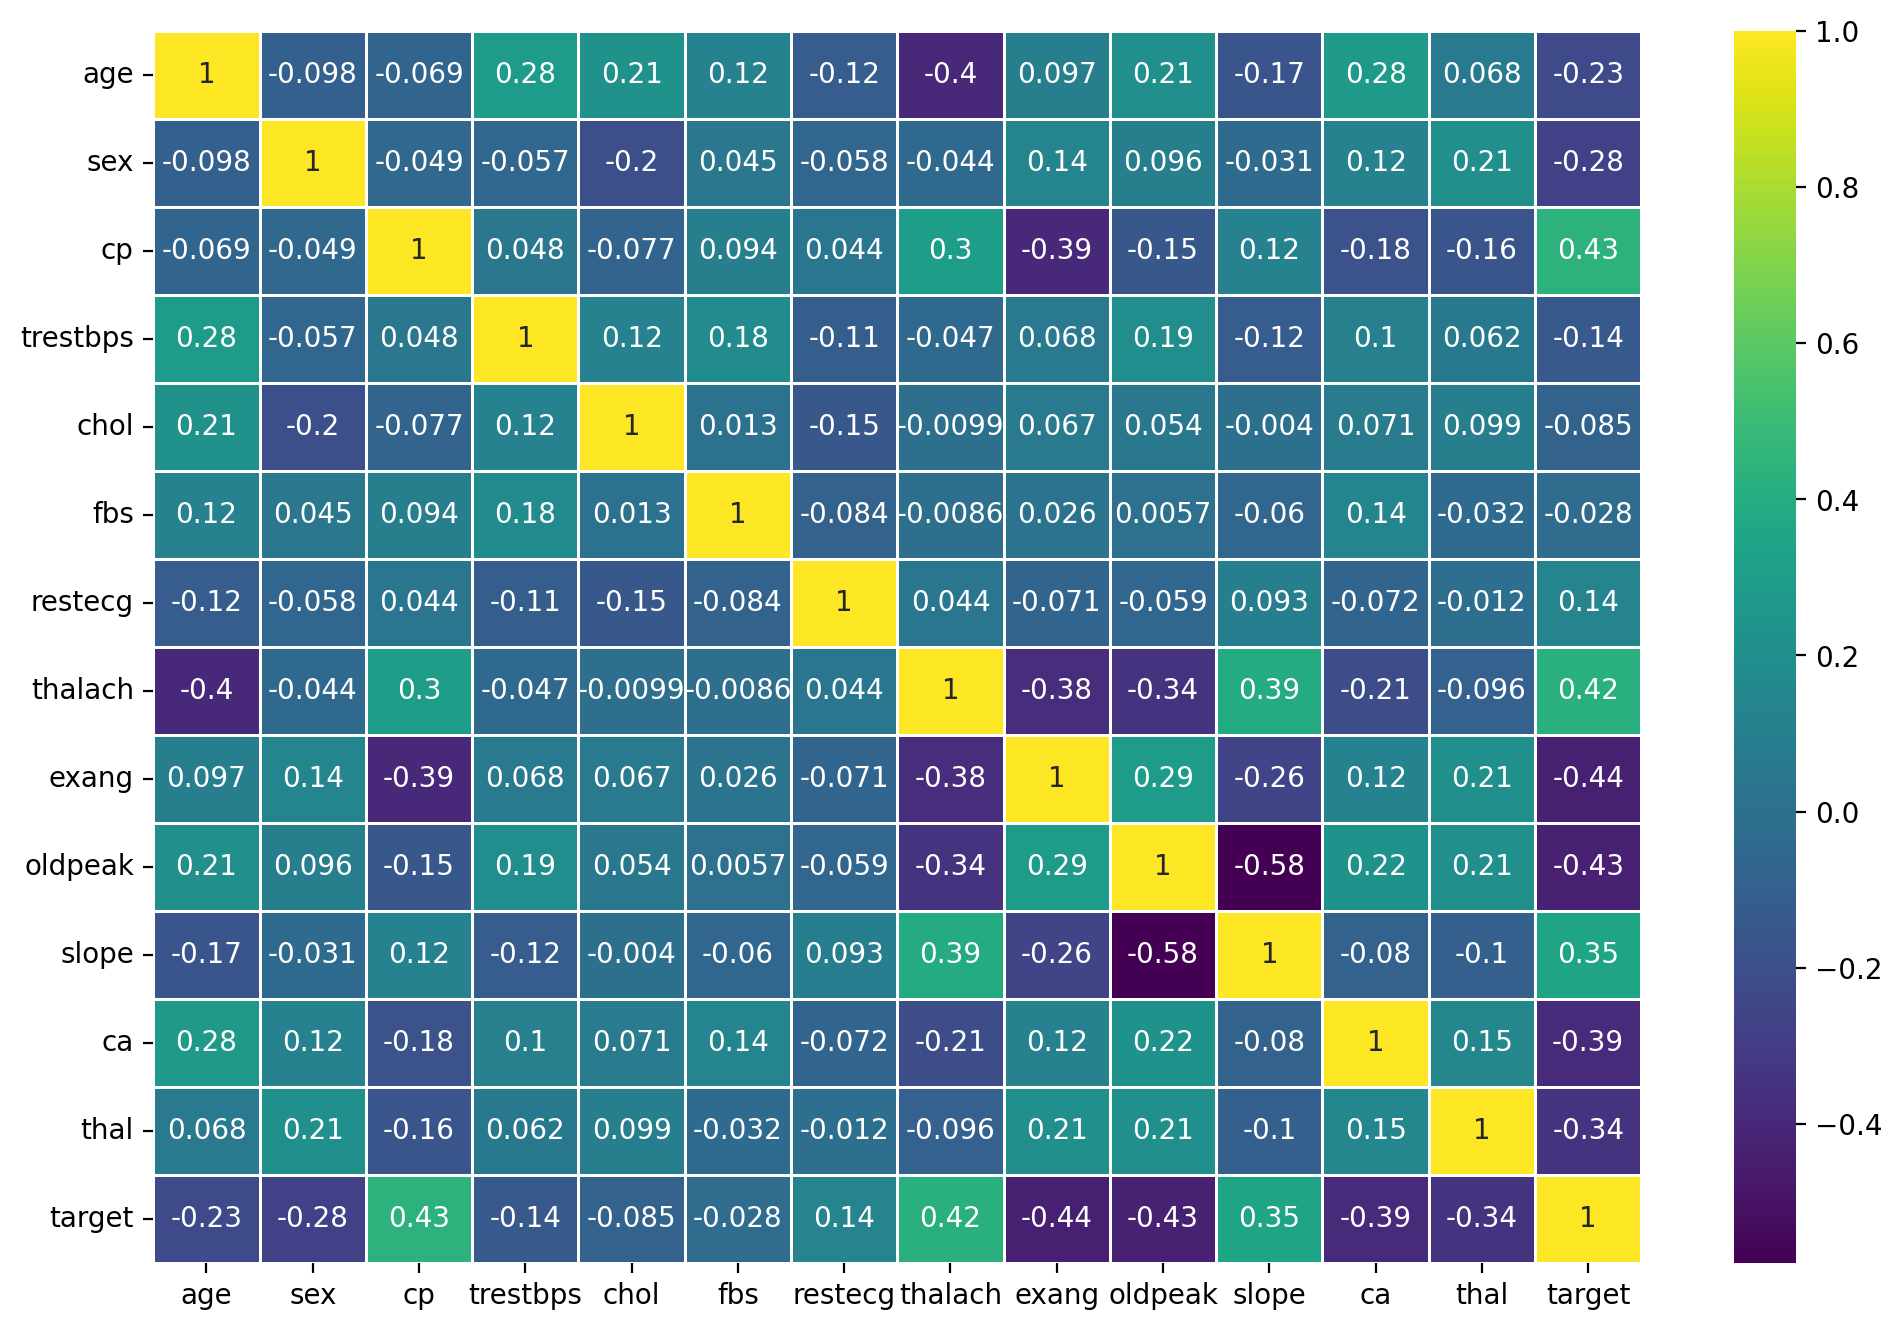

In [14]:
# Display the correlation between all the columns
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(df.corr(), annot = True, lw = 1.005, cmap = 'viridis');

**Positive Correlation with Target in descending order**: cp, thalach, slope, restecg

**Negative Correlation with Target in descending orde**: exang, oldpeak, ca, thal, sex, age, trestps, 

In [15]:
df.corr().target.sort_values()[0: -1]

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
Name: target, dtype: float64

In [16]:
df.corr().target.sort_values().to_frame().index[0: -1]

Index(['exang', 'oldpeak', 'ca', 'thal', 'sex', 'age', 'trestbps', 'chol',
       'fbs', 'restecg', 'slope', 'thalach', 'cp'],
      dtype='object')

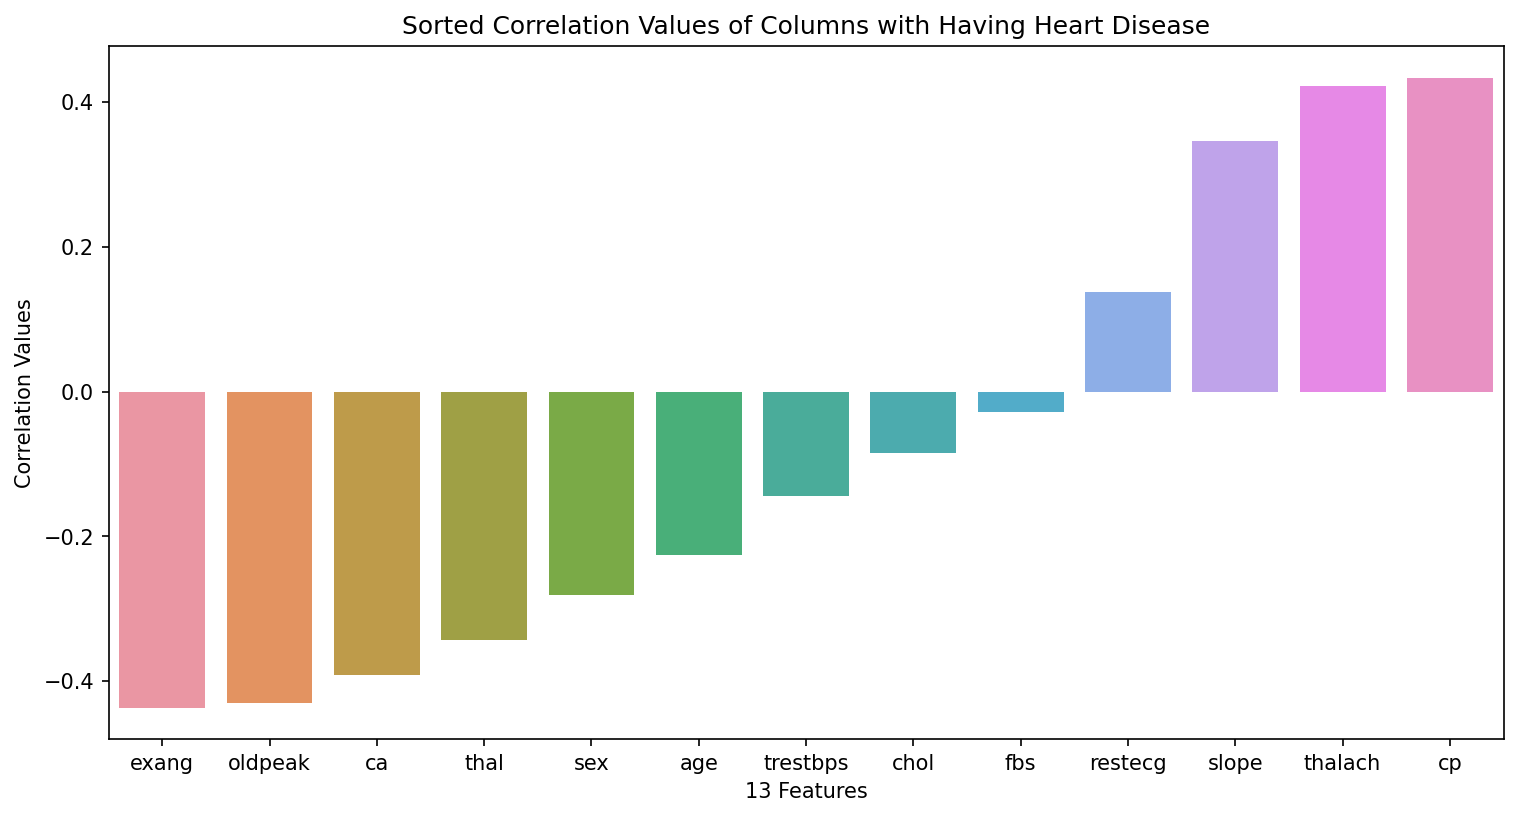

In [17]:
# Display sorted correlation values of each column with the 'target' column
plt.figure(figsize = (12, 6), dpi = 150)
sns.barplot(x = df.corr().target.sort_values().to_frame().index[0: -1],
        y = df.corr().target.sort_values()[0: -1])
plt.title('Sorted Correlation Values of Columns with Having Heart Disease')
plt.xlabel('13 Features')
plt.ylabel('Correlation Values');

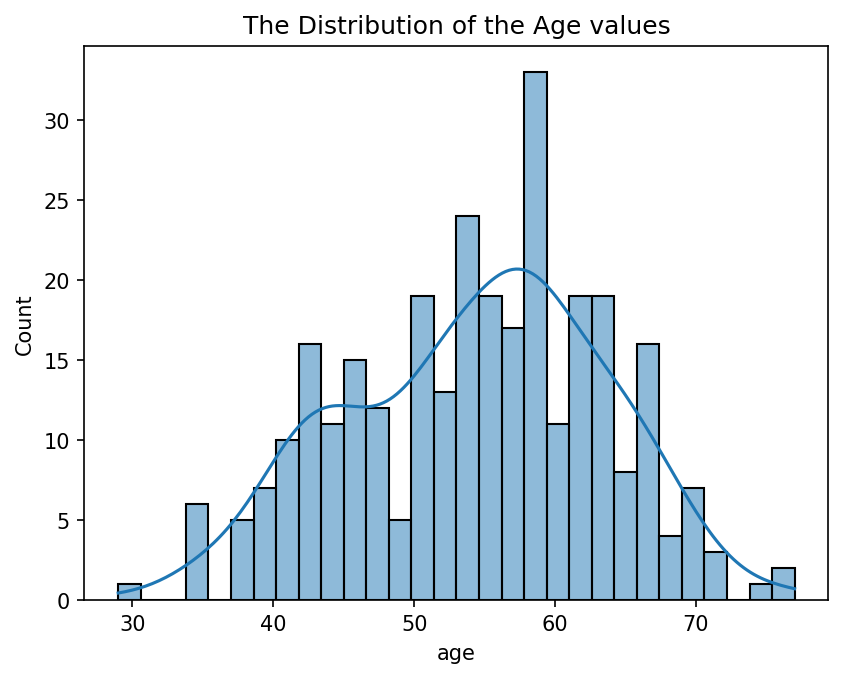

In [18]:
plt.figure(dpi = 150)
sns.histplot(data = df, x = 'age', bins = 30, kde = True)
plt.title('The Distribution of the Age values');

**The range of ages from 40 to 65 clearly indicates that people in this range have higher tendency for having heart disease**

In [19]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


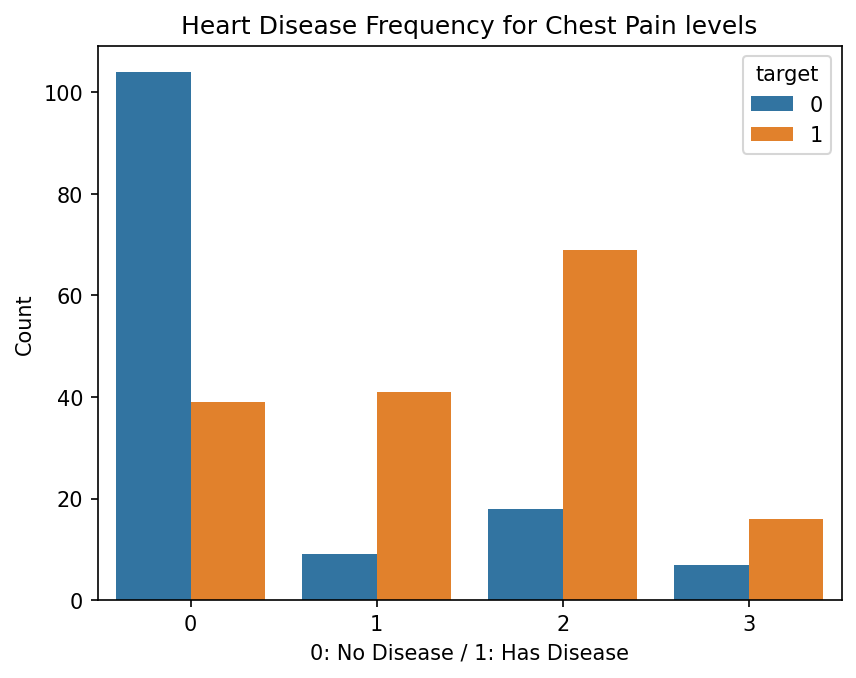

In [20]:
plt.figure(dpi = 150)
sns.countplot(data = df, x = 'cp', hue = 'target')
plt.title('Heart Disease Frequency for Chest Pain levels')
plt.xlabel('Chest Pain Levels')
plt.ylabel('Count')
plt.xlabel('0: No Disease / 1: Has Disease');

----------------
## Modeling

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split the dataset into the Explanatory Variables and the Respone Variable
X = df.drop('target', axis = 1)
y = df.target

In [24]:
# Split Both into training, validation, and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                              test_size=0.1, 
                                              random_state=101)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((272, 13), (31, 13), (272,), (31,))

### Feature Scaling

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

---------------------------
### Create 5 Models and then compare their performance
1. LogisticRegression
2. KNeighborsClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier
5. SVC

In [29]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

### Logistic Regression Model

In [30]:
logi = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 5000)

In [31]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

logi_param_grid = {
    'penalty': penalty,
    'l1_ratio': l1_ratio,
    'C': C
}

In [32]:
logi_grid = GridSearchCV(logi, logi_param_grid, cv = 5)

### K-Nearest Neighbors Classifier

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn_param_grid = {
    'n_neighbors': range(1, 20)
}

In [35]:
knn_grid = GridSearchCV(knn, knn_param_grid, cv = 5)

### Decision Tree Classifier

In [36]:
tree = DecisionTreeClassifier()

In [37]:
max_depth = range(1, 20)
max_leaf_nodes = range(1, 20)
criterion = ["gini", "entropy", "log_loss"]

tree_param_grid = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion
}

In [38]:
tree_grid = GridSearchCV(tree, tree_param_grid, cv = 5)

### Random Forest Classifier

In [39]:
forest = RandomForestClassifier()

In [40]:
forest_grid = {
    'n_estimators': [50, 100],
    'max_features': ["sqrt", "log2"],
    'criterion': ["gini", "entropy"]
}

In [41]:
forest_grid = GridSearchCV(forest, forest_grid, cv = 5)

### Support Vector Classifier

In [42]:
svc = SVC()

In [43]:
svc_param_grid = {
    'C': [0.01, 0.1, 1]
}

In [44]:
svc_grid = GridSearchCV(svc, svc_param_grid, cv = 5)

## Training and Tuning Parameters

In [45]:
models = {
    'LogisticRegression': logi_grid,
    'KNN': knn_grid,
    'DecisionTreeClassifier': tree_grid,
    'RandomForestClassifier': forest_grid,
    'SVC': svc_grid
}

def fit_models(models, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates the performance of given ML models
    """

    model_scores = {}

    for model_name, model in models.items():
        model.fit(scaled_X_train, y_train)
        preds = model.predict(scaled_X_test)
        
        accuracy = accuracy_score(y_test, preds)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        
        model_scores[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'best_params': model.best_params_
        }
        
    return model_scores

In [46]:
model_scores = fit_models(models, scaled_X_train, y_train, scaled_X_test, y_test)

C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: User

In [47]:
print(model_scores)

{'LogisticRegression': {'accuracy': 0.8387096774193549, 'precision': 0.8235294117647058, 'recall': 0.875, 'best_params': {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}}, 'KNN': {'accuracy': 0.8387096774193549, 'precision': 0.8235294117647058, 'recall': 0.875, 'best_params': {'n_neighbors': 9}}, 'DecisionTreeClassifier': {'accuracy': 0.8709677419354839, 'precision': 0.8333333333333334, 'recall': 0.9375, 'best_params': {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 7}}, 'RandomForestClassifier': {'accuracy': 0.8709677419354839, 'precision': 0.875, 'recall': 0.875, 'best_params': {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}}, 'SVC': {'accuracy': 0.8387096774193549, 'precision': 0.8235294117647058, 'recall': 0.875, 'best_params': {'C': 1}}}


In [48]:
comparision = pd.DataFrame(model_scores).T
comparision

,accuracy,precision,recall,best_params
LogisticRegression,0.83871,0.823529,0.875,"{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}"
KNN,0.83871,0.823529,0.875,{'n_neighbors': 9}
DecisionTreeClassifier,0.870968,0.833333,0.9375,"{'criterion': 'entropy', 'max_depth': 3, 'max_..."
RandomForestClassifier,0.870968,0.875,0.875,"{'criterion': 'entropy', 'max_features': 'sqrt..."
SVC,0.83871,0.823529,0.875,{'C': 1}


**It is clear that all models performed quite well and produced same values of metrics but K-Nearest Neighbors Classifier which even performed better**

### Final Model and Its Performance

In [49]:
best_params = model_scores['DecisionTreeClassifier']['best_params']
best_params

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 7}

In [50]:
best_model = DecisionTreeClassifier(**best_params)

In [51]:
best_model.fit(scaled_X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7)

In [52]:
preds = best_model.predict(scaled_X_test)

In [53]:
preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [54]:
print(f'Accuracy: {accuracy_score(y_test, preds)}')
print(f'Precision: {precision_score(y_test, preds)}')
print(f'Recall: {recall_score(y_test, preds)}')
print(classification_report(y_test, preds))

Accuracy: 0.8709677419354839
Precision: 0.8333333333333334
Recall: 0.9375
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



<Figure size 960x720 with 0 Axes>

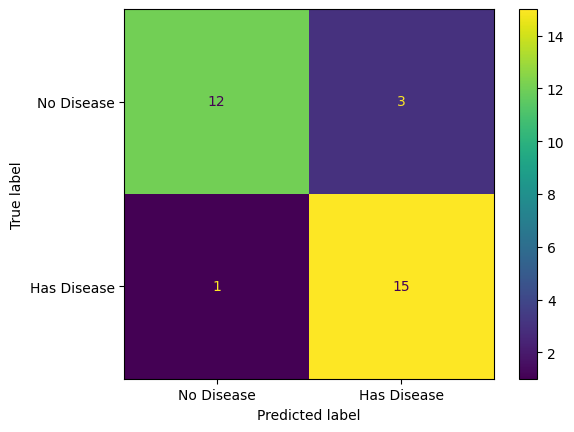

In [55]:
plt.figure(dpi = 150)
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = ['No Disease', 'Has Disease']).plot();

### Performance Curves (Precision Recall Curve & ROC Curve)

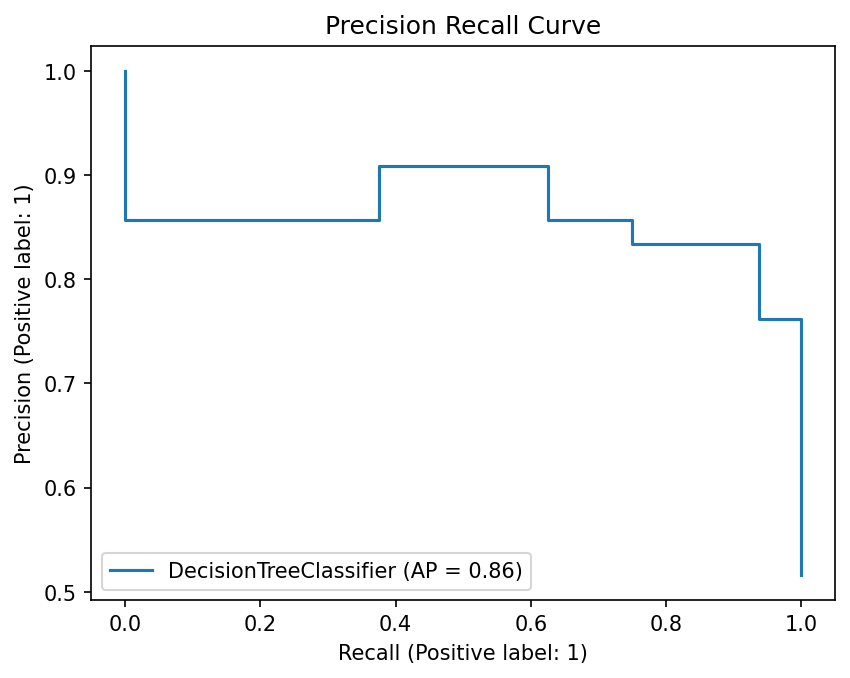

In [56]:
_, ax = plt.subplots(dpi = 150)
PrecisionRecallDisplay.from_estimator(best_model, scaled_X_test, y_test, ax = ax)
plt.title('Precision Recall Curve');

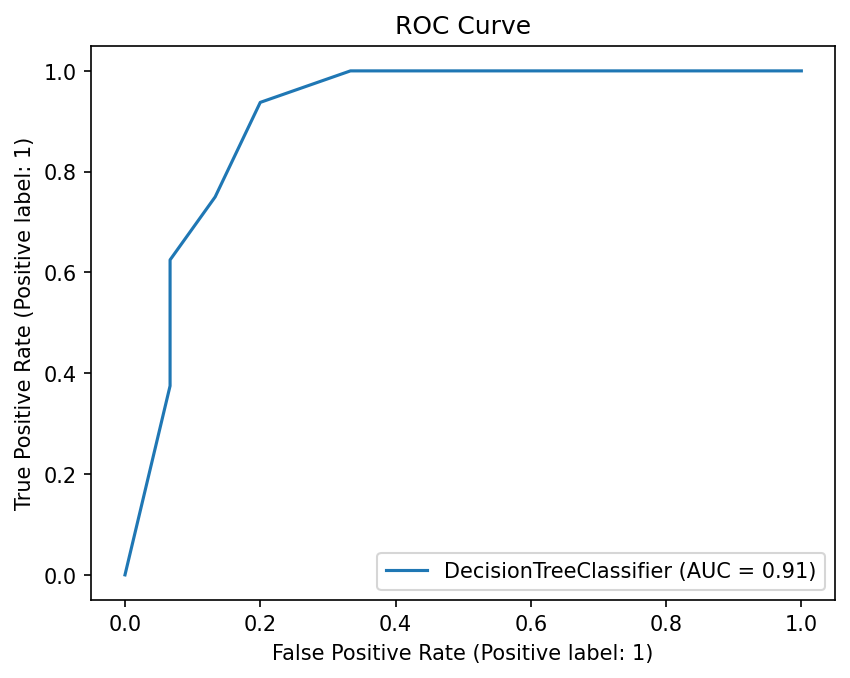

In [57]:
_, ax = plt.subplots(dpi = 150)
RocCurveDisplay.from_estimator(best_model, scaled_X_test, y_test, ax = ax)
plt.title('ROC Curve');

In [58]:
alter_params = model_scores['LogisticRegression']['best_params']
alter_params

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [59]:
alter_model = LogisticRegression(solver = 'saga', max_iter = 5000, **alter_params)

In [60]:
alter_model.fit(scaled_X_train, y_train)

C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(l1_ratio=0.0, max_iter=5000, penalty='l1', solver='saga')

In [61]:
alter_preds = alter_model.predict(scaled_X_test)

In [62]:
alter_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
print(f'Accuracy of Logistic Classification Model: {accuracy_score(y_test, alter_preds)}')
print(f'Precision of Logistic Classification Model: {precision_score(y_test, alter_preds)}')
print(f'Recall of Logistic Classification Model: {recall_score(y_test, alter_preds)}')
print(classification_report(y_test, alter_preds))

Accuracy of Logistic Classification Model: 0.8387096774193549
Precision of Logistic Classification Model: 0.8235294117647058
Recall of Logistic Classification Model: 0.875
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



<Figure size 960x720 with 0 Axes>

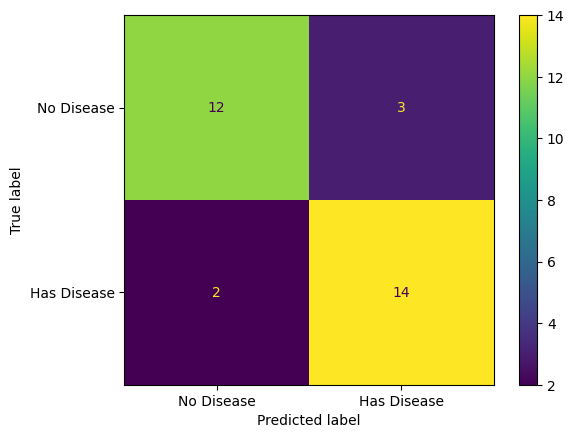

In [64]:
plt.figure(dpi = 150)
ConfusionMatrixDisplay(confusion_matrix(y_test, alter_preds), display_labels = ['No Disease', 'Has Disease']).plot();

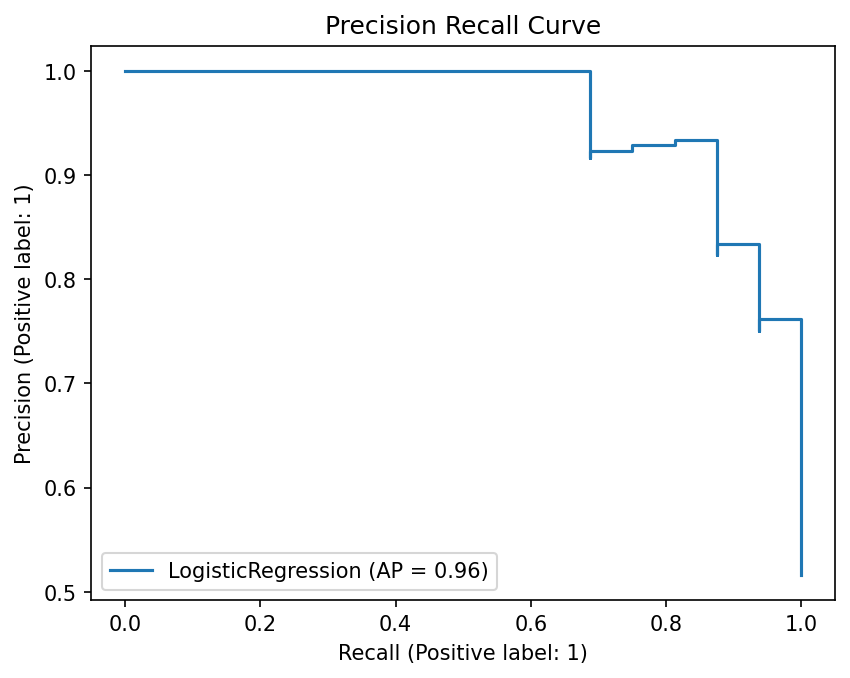

In [65]:
_, ax = plt.subplots(dpi = 150)
PrecisionRecallDisplay.from_estimator(alter_model, scaled_X_test, y_test, ax = ax)
plt.title('Precision Recall Curve');

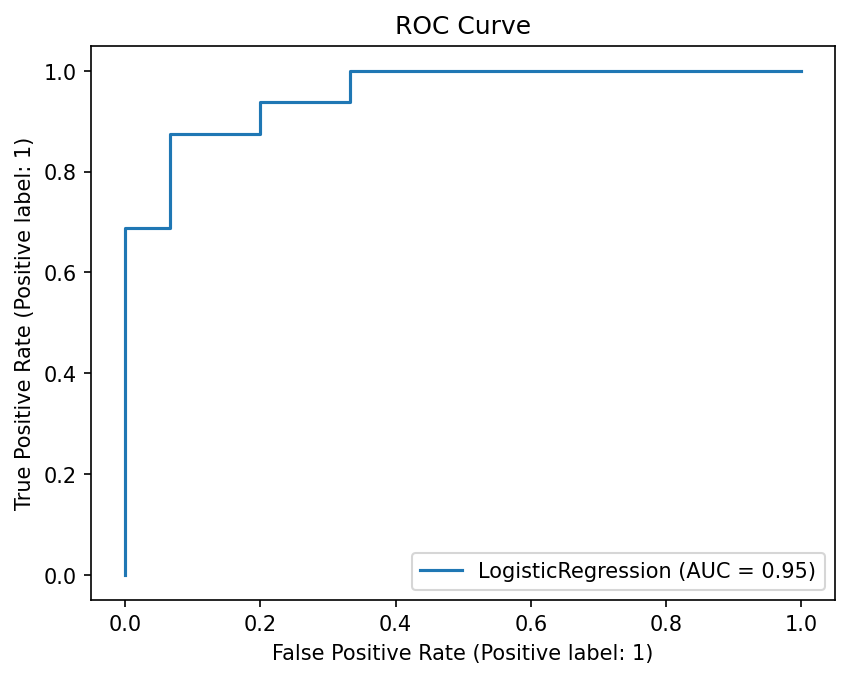

In [66]:
_, ax = plt.subplots(dpi = 150)
RocCurveDisplay.from_estimator(alter_model, scaled_X_test, y_test, ax = ax)
plt.title('ROC Curve');

It is quite suprised that while metrics ***(accuracy, precision, recall)*** of the **Decision Tree Classifier** are higher than those of other models such as **Logistic Regression Model**, ***Precision Recall Curve*** and ***ROC Curve*** of this model have higer values of **AP (0.96) & AUC (0.95)** compared to those of **AP (0.96) & AUC (0.95)** of **Decision Tree Classifier**.

In [67]:
coefs = pd.DataFrame(data = alter_model.coef_[0], index = X.columns, 
                     columns = ['Coefficients'])

In [68]:
coefs = coefs.sort_values('Coefficients')

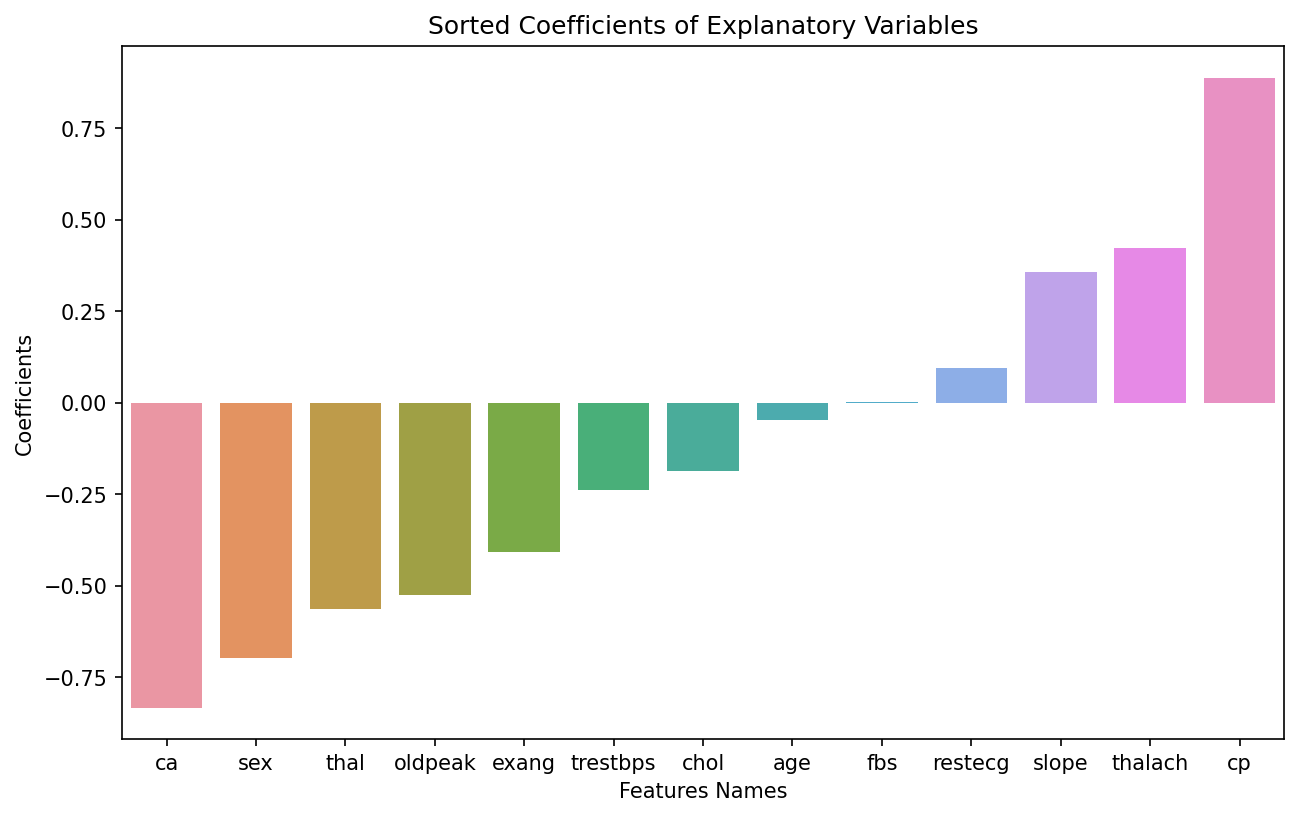

In [69]:
plt.figure(figsize = (10, 6), dpi = 150)
sns.barplot(data = coefs, y = 'Coefficients', x = coefs.index)
plt.title('Sorted Coefficients of Explanatory Variables')
plt.xlabel('Features Names');

## Prediction of New Data

In [70]:
# Creates a new array of the features for a new patient
new_patient = [[64, 1, 0, 120, 270, 0, 0, 116, 2, 3.0, 1, 2, 2]]

#### Prediction of Decision Tree Model

In [71]:
best_model.predict_proba(new_patient)

array([[0.4, 0.6]])

In [72]:
best_model.predict(new_patient)

array([1], dtype=int64)

#### Prediction of Logisitic Regression Model

In [73]:
alter_model.predict_proba(new_patient)

array([[1.00000000e+00, 1.89865745e-17]])

In [74]:
alter_model.predict(new_patient)

array([0], dtype=int64)

----------------------------------------------
# Thank You!